In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [5]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [n * 2 * np.pi / N  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [6]:
def show_opsims(dbDir):
    '''Show available opsim databases in the provided directory.

    Args:
        dbDir(str): The path the database directory.
    '''

    dbDir = os.path.abspath(dbDir)
    db_list = glob.glob(dbDir+'/*.db')
    runNames = [os.path.splitext(os.path.basename(x))[0] for x in db_list]

    return runNames


In [7]:
def scale(arr, mode=0):
    """scale array by max or scale to 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [8]:
# name of opsims
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

# v1.5  86
# v1.6  30 
# v1.7  74

runNames = show_opsims(dbpath)

runNames.sort()

In [9]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

#cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

### prapare df_radar

In [181]:
# for wfd
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_wfd.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_wfd.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_wfd.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_wfd.csv')

# for all
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_all_noddf.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_all.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_all.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_all.csv')

# for GP inwfd
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_GP_inwfd.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_GP_inwfd.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_GP_inwfd.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_GP_inwfd.csv')

# for GP all
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_GP_allsky.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_GP_allsky.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_GP_allsky.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_GP_all.csv')


# for LMC inwfd
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_LMC_inwfd.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_LMC_inwfd.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_LMC_inwfd.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_LMC_inwfd.csv')

# for LMC all
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_LMC_allsky.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_LMC_allsky.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_LMC_allsky.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_LMC_all.csv')

# for SMC inwfd
#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_SMC_inwfd.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_SMC_inwfd.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_SMC_inwfd.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_SMC_inwfd.csv')

# for SMC all
df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_SMC_allsky.csv')
df_nfields = pd.read_csv('./data_v1_5/df_Nfields_SMC_allsky.csv')
df_nstars = pd.read_csv('./data_v1_5/df_Nstars_SMC_allsky.csv')
df_depth = pd.read_csv('./data_v1_5/df_depth_SMC_all.csv')




In [182]:
# normalize
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_tgaps[col] = scale(df_tgaps[col])
    df_nfields[col] = scale(df_nfields[col])
    df_nstars[col] = scale(df_nstars[col])

for col in filters:
    df_depth[col] = scale(df_depth[col], mode=1)

df_tgaps['total_same'] = scale( np.sum(df_tgaps[ cols_same ], axis=1) )
df_tgaps['total_diff'] = scale( np.sum(df_tgaps[ cols_diff ], axis=1) )
df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
df_nstars['total'] = scale( np.sum(df_nstars[ cols_all ], axis=1) )
df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )


In [177]:
df_radar = pd.DataFrame()
df_radar['db'] = runNames

df_radar['FoM_tgaps_same'] = df_tgaps['total_same'] 
df_radar['FoM_tgaps_diff'] = df_tgaps['total_diff'] 

df_radar['FoM_EG'] = df_nfields['total']
df_radar['FoM_Gal'] = df_nstars['total']
df_radar['FoM_depth'] = df_depth['total']
df_radar['family'] = df_radar.apply(get_family, axis=1)

# save file 
df_radar.to_csv('./data_v1_5/df_radar_SMC_allsky.csv', index=False)

### prepare csv data for d3 chart

In [171]:
def replace_dot(df):
    """replace . in dbname by _ for d3js"""
    dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    return dbname
    
def get_df_radar_d3js(df_radar):
    """get csv data for d3js radar plot"""
    df_radar['db'] = df_radar.apply(replace_dot, axis=1)
    df_radar_t = df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})
    return df_radar_t
    
    

In [178]:
df_radar = pd.read_csv('./data_v1_5/df_radar_SMC_inwfd.csv')

df_radar = df_radar.drop('family', axis=1)



In [179]:
df_radar_t = get_df_radar_d3js(df_radar)
df_radar_t.to_csv("data_v1_5/df_radar_SMC_inwfd_t.csv", index=False)



In [180]:
df_radar_t

db,section,agnddf,alt_dust,alt_roll_mod2_dust_sdf_0_20,baseline_2snaps,baseline_samefilt,baseline,bulges_bs,bulges_bulge_wfd,bulges_cadence_bs,...,wfd_depth_scale0_80_noddf,wfd_depth_scale0_80,wfd_depth_scale0_85_noddf,wfd_depth_scale0_85,wfd_depth_scale0_90_noddf,wfd_depth_scale0_90,wfd_depth_scale0_95_noddf,wfd_depth_scale0_95,wfd_depth_scale0_99_noddf,wfd_depth_scale0_99
0,FoM_tgaps_same,0.0,0.733511,0.864012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FoM_tgaps_diff,0.0,0.732666,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FoM_EG,0.0,0.926267,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FoM_Gal,0.0,0.965350,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FoM_depth,0.0,1.000000,0.803699,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### plot radar 

In [103]:
df_radar = pd.read_csv("./data_v1_5/df_radar_all.csv")

In [104]:
df_radar.head()

,db,FoM_tgaps_same,FoM_tgaps_diff,FoM_EG,FoM_Gal,FoM_depth,family
0,agnddf_v1.5_10yrs,0.145183,0.526600,0.544217,0.202758,0.943507,agnddf
1,alt_dust_v1.5_10yrs,0.152272,0.751096,0.565258,0.164858,0.865168,alt
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.157885,0.850064,0.657932,0.162007,0.810365,alt
3,baseline_2snaps_v1.5_10yrs,0.139289,0.484341,0.326307,0.138447,0.900398,baseline
4,baseline_samefilt_v1.5_10yrs,0.206147,0.207056,0.347804,0.125631,0.908902,baseline


[1.         0.90433241 0.47720047 1.         0.45371033]
[0.14404315 0.64537052 0.97085933 0.89986364 0.29003167]
[0.15355534 0.62324005 0.98517016 0.92746339 1.        ]
[0.23365614 1.         0.80895276 0.81806327 0.27655116]
[0.63008932 0.55902447 0.87176209 0.71231442 0.28210477]


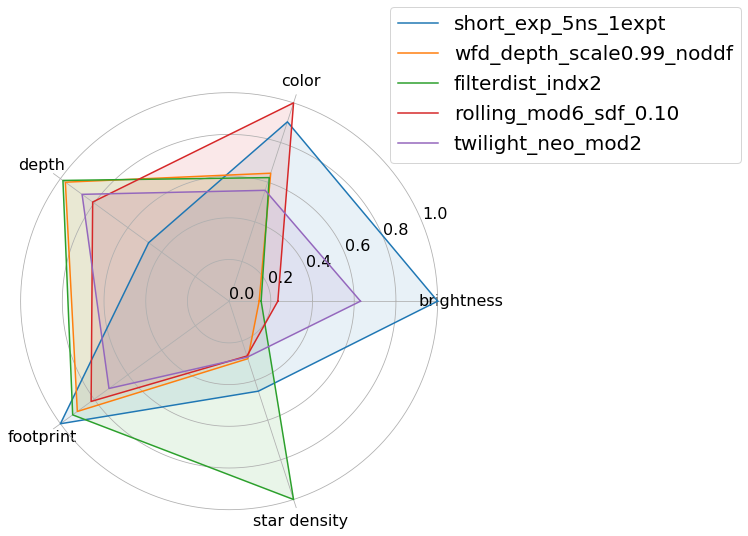

In [105]:
dbnames = [ #'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           #'twilight_neo_mod1_v1.5_10yrs',
           #'wfd_depth_scale0.99_v1.5_10yrs'
           'short_exp_5ns_1expt_v1.5_10yrs',
           'wfd_depth_scale0.99_noddf_v1.5_10yrs',
           #'bulges_bs_v1.5_10yrs',
           'filterdist_indx2_v1.5_10yrs',
           'rolling_mod6_sdf_0.10_v1.5_10yrs',
           'twilight_neo_mod2_v1.5_10yrs',
           #'footprint_big_sky_nouiyv1.5_10yrs'  
          ]

FoMvars = ['FoM_tgaps_same', 'FoM_tgaps_diff', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]

#FoMvars = ['FoM_tgapsEvol', 'FoM_tgapsCol', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    print(r)
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

FoMvarsnames = ['brightness', "color", "depth", "footprint", "star density"]#,
ax.set_xticklabels(FoMvarsnames, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.2))

plt.savefig("figures/radar_all.pdf", bbox_inches='tight')

In [72]:
df_radar = pd.read_csv("./data_v1_5/df_radar_wfd.csv")

[1.         0.88405441 0.35864895 1.         1.        ]
[0.1536691  0.66336798 0.94213813 0.95117147 0.91284718]
[0.1567001  0.61472782 0.96323842 0.91386    0.86100146]
[0.2414304  1.         0.67459161 0.85072835 0.82409506]
[0.63196712 0.54912376 0.75989383 0.74303947 0.7753332 ]


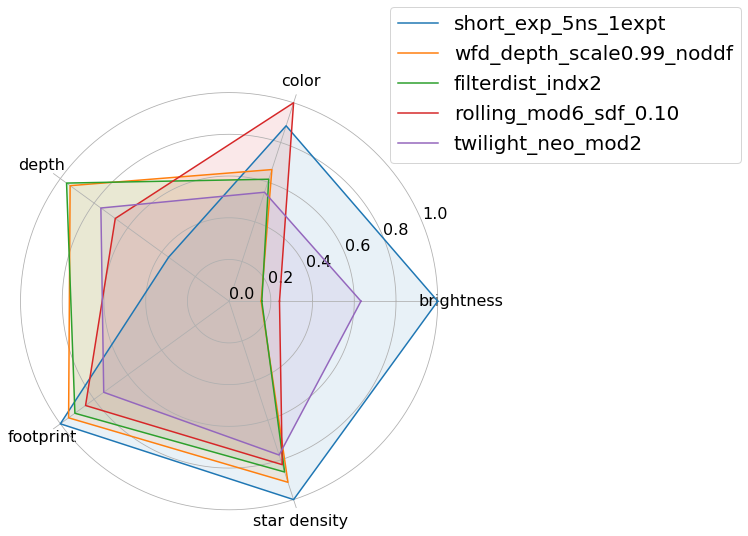

In [73]:
dbnames = [ #'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           #'twilight_neo_mod1_v1.5_10yrs',
           #'wfd_depth_scale0.99_v1.5_10yrs'
           'short_exp_5ns_1expt_v1.5_10yrs',
           'wfd_depth_scale0.99_noddf_v1.5_10yrs',
           #'bulges_bs_v1.5_10yrs',
           'filterdist_indx2_v1.5_10yrs',
           'rolling_mod6_sdf_0.10_v1.5_10yrs',
           'twilight_neo_mod2_v1.5_10yrs',
           #'footprint_big_sky_nouiyv1.5_10yrs'  
          ]

FoMvars = ['FoM_tgaps_same', 'FoM_tgaps_diff', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]

#FoMvars = ['FoM_tgapsEvol', 'FoM_tgapsCol', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)
    print(r)

FoMvarsnames = ['brightness', "color", "depth", "footprint", "star density"]#,
ax.set_xticklabels(FoMvarsnames, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.2))

plt.savefig("figures/radar_wfd.pdf", bbox_inches='tight')

### parallel coord plot

In [18]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}


In [19]:
def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]

In [20]:
df_radar['family'] = df_radar.apply(get_family, axis=1)



In [21]:
df_radar.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [22]:
colorlist = [ family2color[i] for i in df_radar.family.values ]

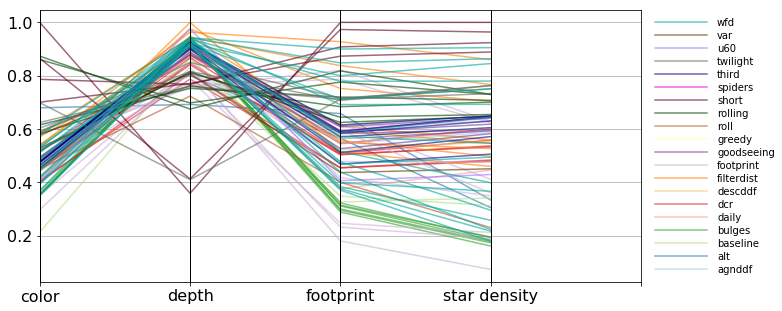

In [24]:
fig = plt.figure(figsize=(12,5))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]

ax = pd.plotting.parallel_coordinates(
    df_radar, "db", FoMvars, color=colorlist, alpha=0.6)

plt.xticks([0,1,2,3,4], labels=["color", "depth", "footprint", "star density"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
#plt.savefig('figures/opsimParallelCoord.pdf')
